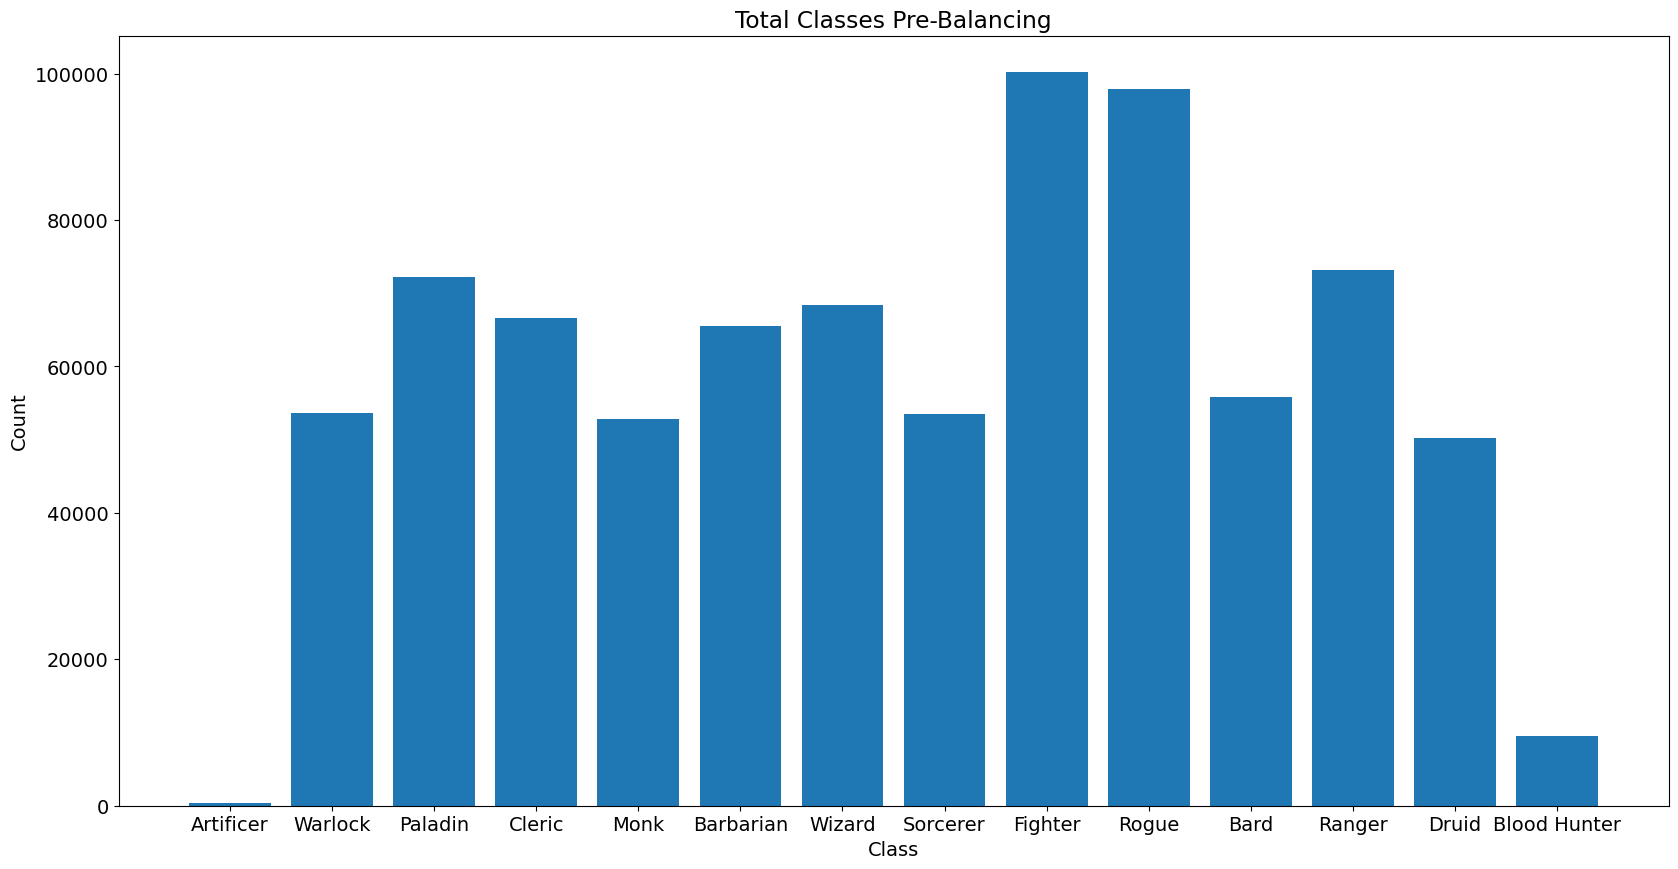

/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

[Text(0.7586050134220214, 0.9827586206896551, 'Intelligence <= 0.949\ngini = 0.929\nsamples = 448000\nvalue = [31944, 32035, 31903, 31977, 32015, 32071, 31999, 31911\n32108, 31957, 31977, 31958, 31934, 32211]'),
 Text(0.5746978809183972, 0.9482758620689655, 'Charmisma <= 0.946\ngini = 0.921\nsamples = 363791\nvalue = [7095, 30994, 29612, 29632, 29657, 27897, 29991, 30519\n30659, 29658, 28042, 27119, 28001, 4915]'),
 Text(0.3869716926787515, 0.9137931034482759, 'Wisdom <= 0.946\ngini = 0.906\nsamples = 267251\nvalue = [5860, 29740, 5375, 27856, 27402, 26367, 28253, 29337\n20923, 28162, 23503, 5339, 5181, 3953]'),
 Text(0.2460122473148802, 0.8793103448275862, 'Dexterity <= 0.974\ngini = 0.89\nsamples = 191048\nvalue = [5094, 28824, 4367, 22762, 3668, 4097, 27253, 20594\n19401, 23291, 22003, 3768, 3473, 2453]'),
 Text(0.1468059475326058, 0.8448275862068966, 'Charmisma <= 0.862\ngini = 0.838\nsamples = 101966\nvalue = [2059, 25208, 1488, 13997, 2863, 2552, 21453, 3173\n18240, 3695, 1585, 2

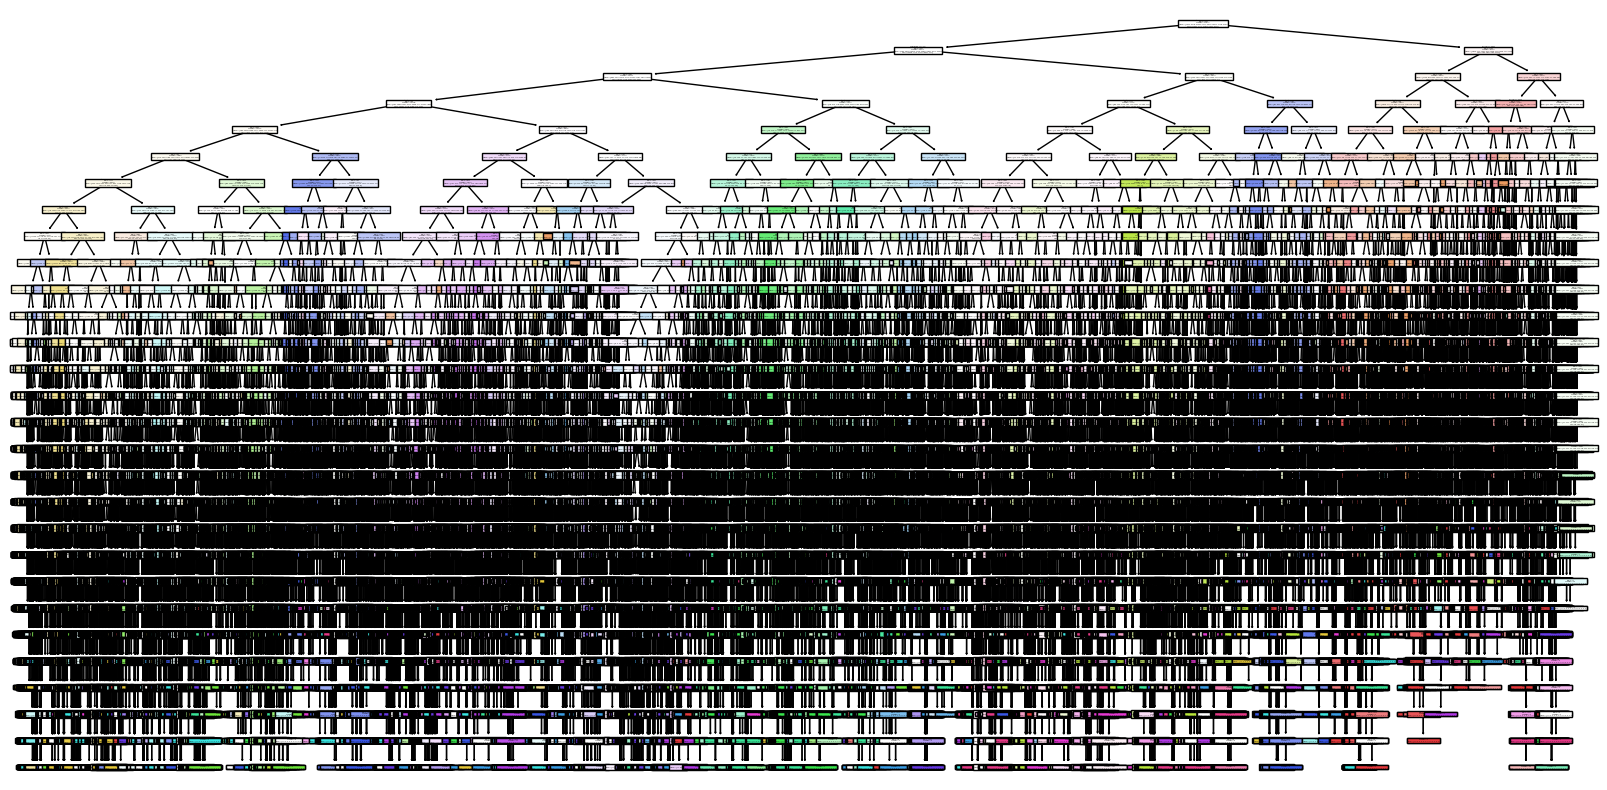

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 14

data = pd.read_csv("./data/proportionalData.csv")
classes = data["class_starting"].unique()
counts = []

for c in classes:
    counts.append(len(data[data["class_starting"] == c]))

fig1, ax1 = plt.subplots()
ax1.bar(classes, height=counts, label=data["class_starting"].unique())
ax1.set_title("Total Classes Pre-Balancing")
ax1.set_xlabel("Class")
ax1.set_ylabel("Count")

plt.show()

stats = ["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha"]
stats_names = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charmisma"]

downsized_stats = pd.DataFrame(columns=["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha", "class_starting"])
for c in data["class_starting"].unique():
    sample = data[data["class_starting"] == c].sample(n=40000, random_state=2137, replace=True)
    downsized_stats = downsized_stats.append(sample)

X_train, X_test, y_train, y_test = train_test_split(np.array(downsized_stats[stats]), np.array(downsized_stats["class_starting"]), random_state=2137, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=28)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_predict)
y_predict = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_predict)

tree.plot_tree(clf,filled=True, feature_names=stats_names)

/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_112/1178443880.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_112/1178443880.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_112/1178443880.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_112/1178443880.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

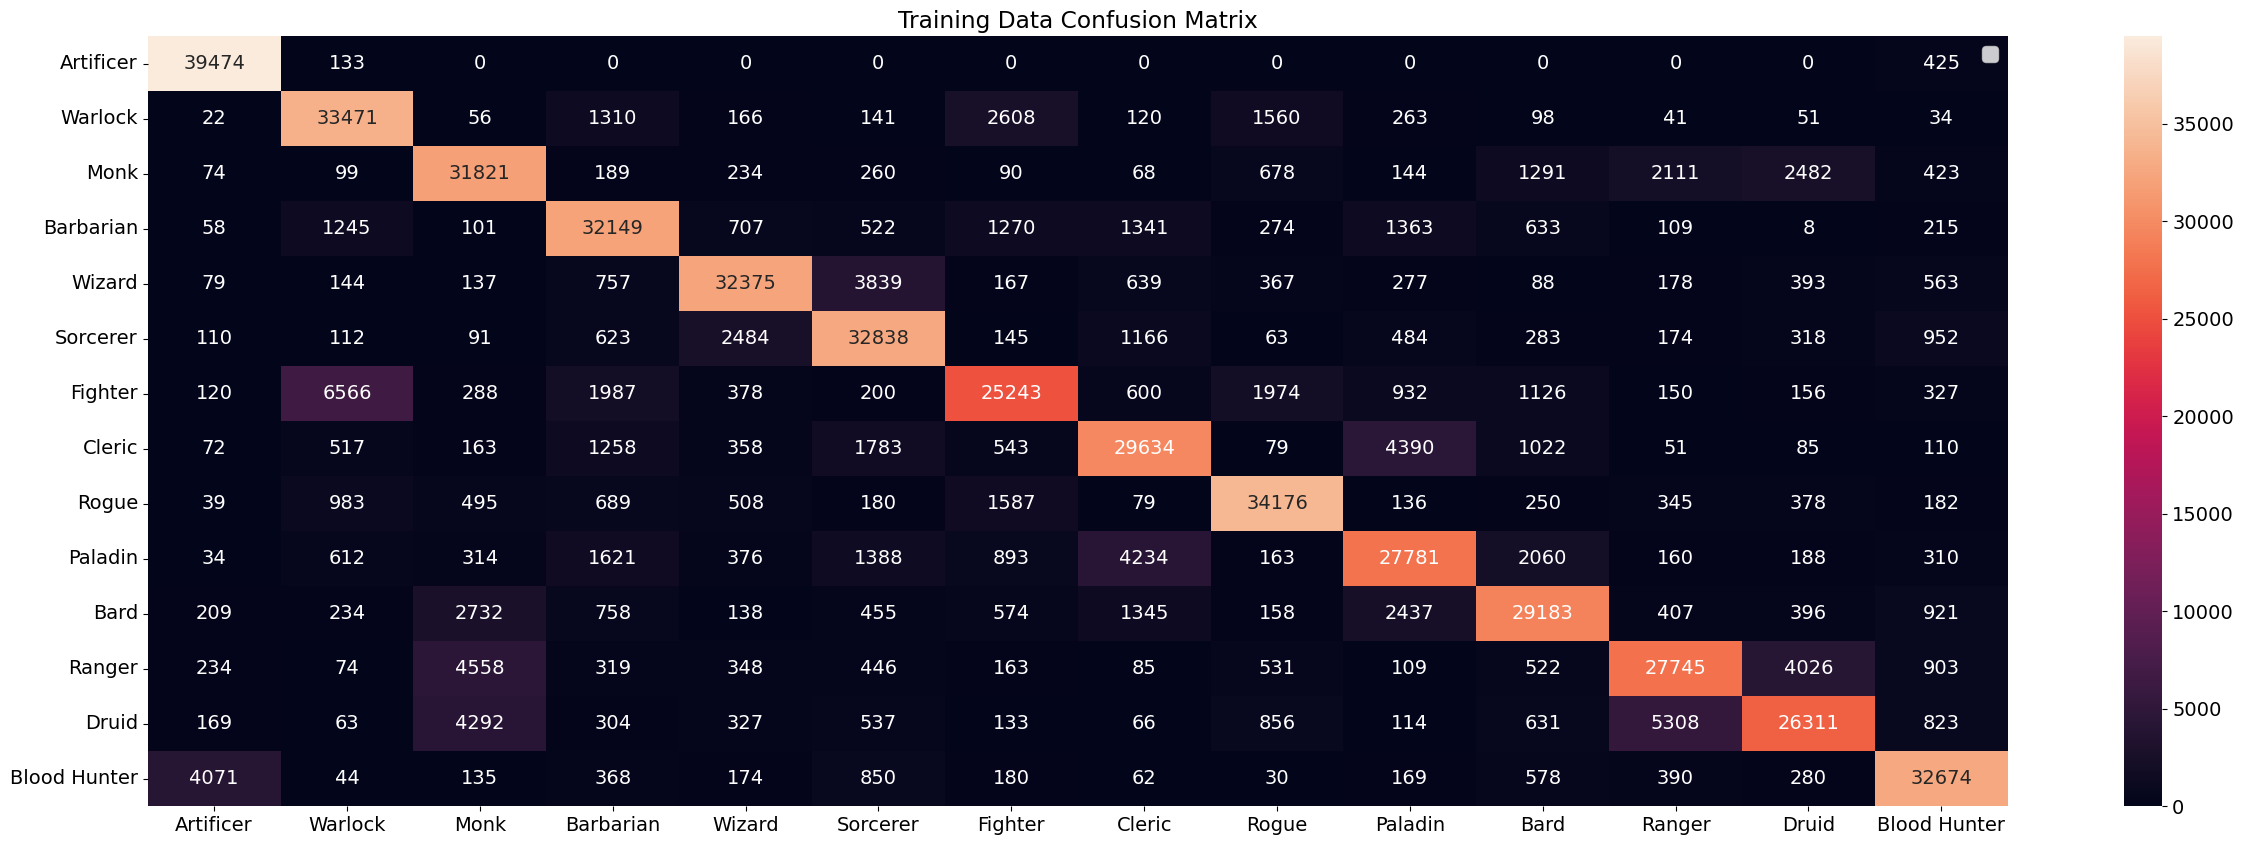

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


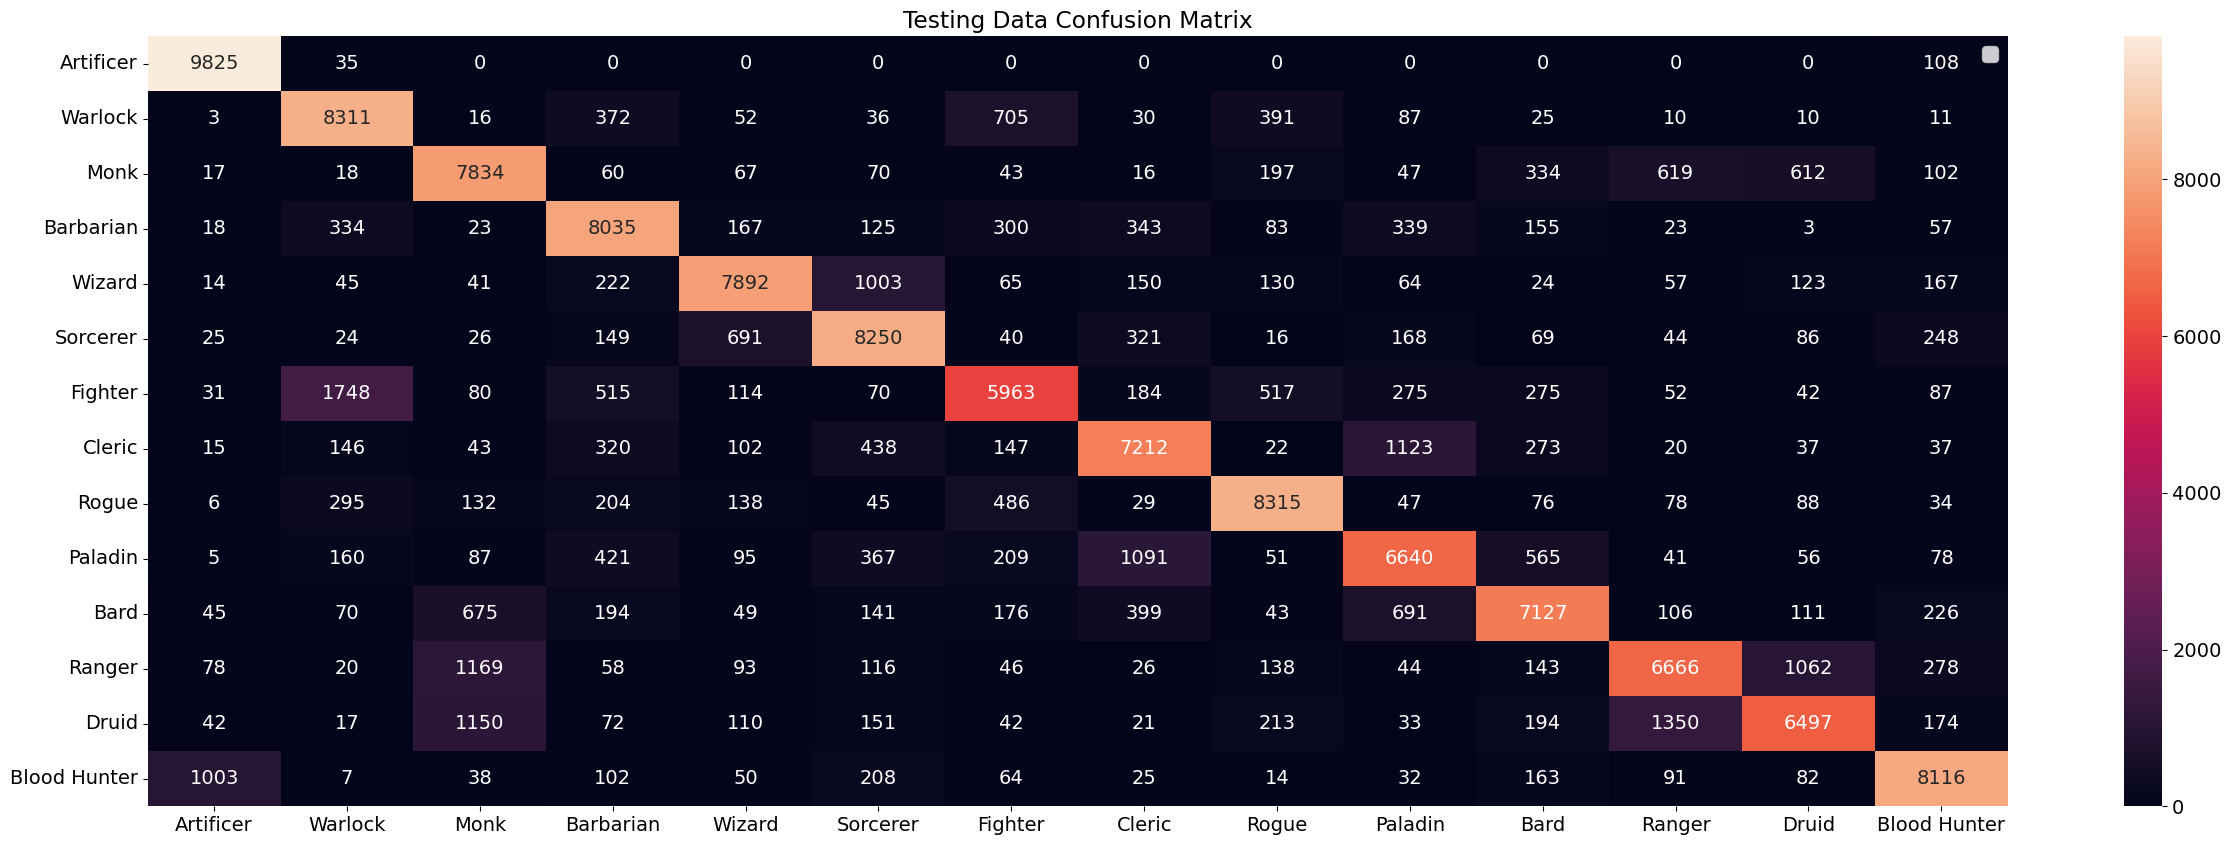

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams["font.size"] = 14

stats = ["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha"]
stats_names = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charmisma"]
data = pd.read_csv("./data/proportionalDataStripped.csv")
classes = data["class_starting"].unique()

downsized_stats = pd.DataFrame(columns=["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha", "class_starting"])
for c in data["class_starting"].unique():
    sample = data[data["class_starting"] == c].sample(n=50000, random_state=2137, replace=True)
    downsized_stats = downsized_stats.append(sample)

X_train, X_test, y_train, y_test = train_test_split(np.array(downsized_stats[stats]), np.array(downsized_stats["class_starting"]), random_state=2137, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=29)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_train)
train_con_mat = confusion_matrix(y_train, y_predict)
y_predict = clf.predict(X_test)
test_con_mat = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(train_con_mat, annot = True, fmt='g')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0)
ax.set_title("Training Data Confusion Matrix")

plt.legend()
plt.show()

ax = sns.heatmap(test_con_mat, annot = True, fmt='g')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0)
ax.set_title("Testing Data Confusion Matrix")

plt.legend()
plt.show()

/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_46143/3130846331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_46143/3130846331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_46143/3130846331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_46143/3130846331.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

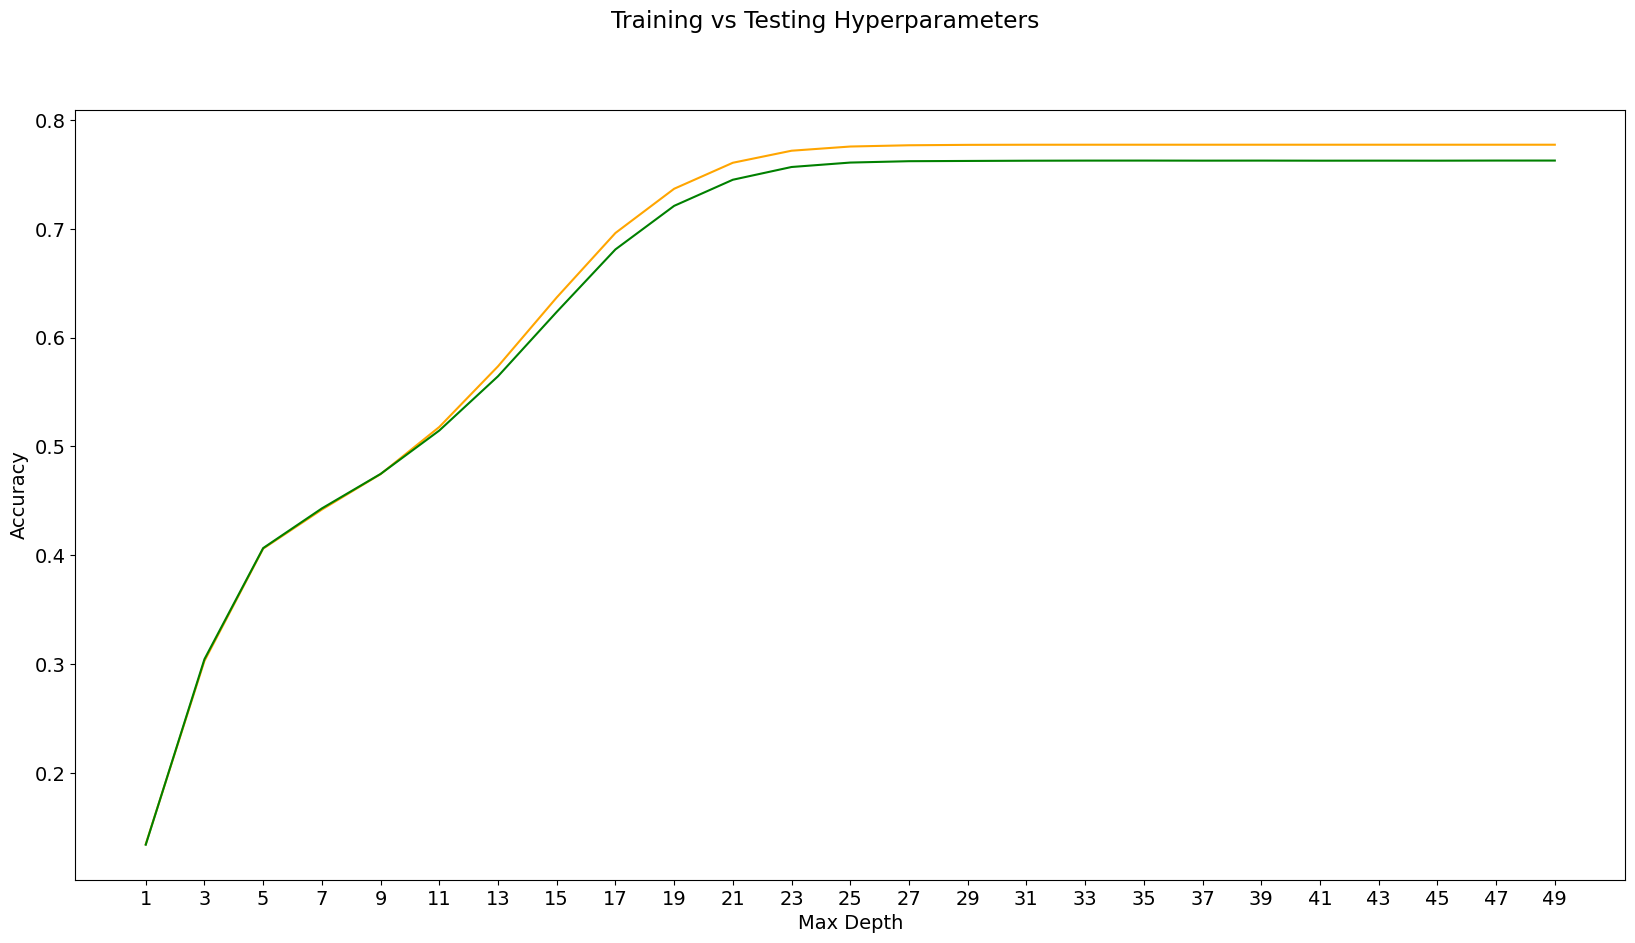

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 14

stats = ["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha"]
stats_names = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charmisma"]
data = pd.read_csv("./data/proportionalDataStripped.csv")
classes = data["class_starting"].unique()

downsized_stats = pd.DataFrame(columns=["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha", "class_starting"])
for c in data["class_starting"].unique():
    sample = data[data["class_starting"] == c].sample(n=50000, random_state=2137, replace=True)
    downsized_stats = downsized_stats.append(sample)

X_train, X_test, y_train, y_test = train_test_split(np.array(downsized_stats[stats]), np.array(downsized_stats["class_starting"]), random_state=2137, test_size=0.2)

training = []
testing = []
for i in range(1, 50, 2):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_predict)
    y_predict = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_predict)
    
    training.append(train_acc)
    testing.append(test_acc)
    
fig, axs = plt.subplots()
fig.suptitle('Training vs Testing Hyperparameters')
    
axs.plot(range(1, 50, 2), training, c = "Orange", label = "Training")
axs.plot(range(1, 50, 2), testing, c = "Green", label = "Testing")
axs.set(xlabel = "Max Depth", ylabel = "Accuracy", xticks = np.arange(1, 50, 2))
plt.show()